In [1]:
import pandas as pd
import numpy as np

In [2]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'age': [42, 52, 36, 24, 73], 
        'preTestScore': [4, 24, 31, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70]}
df = pd.DataFrame(data, columns=['name', 'age', 'preTestScore', 'postTestScore'])
df

,name,age,preTestScore,postTestScore
0,Jason,42,4,25
1,Molly,52,24,94
2,Tina,36,31,57
3,Jake,24,2,62
4,Amy,73,3,70


In [3]:
df['elderly'] = np.where(df['age']>=50, 1, 0)
df

,name,age,preTestScore,postTestScore,elderly
0,Jason,42,4,25,0
1,Molly,52,24,94,1
2,Tina,36,31,57,0
3,Jake,24,2,62,0
4,Amy,73,3,70,1


In [4]:
df['labels'] = [1,0,1,0,1]
df

,name,age,preTestScore,postTestScore,elderly,labels
0,Jason,42,4,25,0,1
1,Molly,52,24,94,1,0
2,Tina,36,31,57,0,1
3,Jake,24,2,62,0,0
4,Amy,73,3,70,1,1


In [5]:
numericColumns = ['age']
binaryColumns = ['elderly']
denom = {}
ar = {}
for col in numericColumns:
    denom[col] = df[col].mean();

for col in numericColumns:
    ar[col] = df.fillna(value=0.0).groupby('labels')[[col]].mean().max().values[0]/denom[col]

def test_sum(series):
    return (series.sum()/(len(series)-series.sum()))
for col in binaryColumns:
    groups = df.groupby('labels')[[col]]
    ar[col] = groups.aggregate([test_sum]).max().values[0]
ar

{'age': 1.1086637298091044, 'elderly': 1.0}

In [6]:
def calAttributeRatio(df, numericColumns,binaryColumns):
    denom = {}
    ar = {}
    for col in numericColumns:
        denom[col] = df[col].mean();

    for col in numericColumns:
        ar[col] = df.fillna(value=0.0).groupby('labels')[[col]].mean().max().values[0]/denom[col]

    def test_sum(series):
        return (series.sum()/(len(series)-series.sum()))
    for col in binaryColumns:
        groups = df.groupby('labels')[[col]]
        ar[col] = groups.aggregate([test_sum]).max().values[0]
    return ar

numericColumns = ['age']
binaryColumns = ['elderly']
ar_op = calAttributeRatio(df,numericColumns,binaryColumns)
print(ar_op)
def selectTopFeaturesByAR(ar_op, min_ar):
    return [c for c in ar_op.keys() if ar_op[c]>=min_ar]
selectTopFeaturesByAR(ar_op,1.005)

{'age': 1.1086637298091044, 'elderly': 1.0}


['age']

In [7]:
print(df.shape)
import math
def entropy(data, target_attr):
 
    val_freq = {}
    data_entropy = 0.0
 
    # Calculate the frequency of each of the values in the target attr
    for record in data:
        if record[target_attr] in val_freq:
        #(val_freq.has_key(record[target_attr])):
            val_freq[record[target_attr]] += 1.0
        else:
            val_freq[record[target_attr]]  = 1.0
 
    # Calculate the entropy of the data for the target attribute
    for freq in val_freq.values():
        data_entropy += (-freq/len(data)) * math.log(freq/len(data), 2) 
 
    return data_entropy
entropy(df,2)

(5, 6)


2.3863137138648347

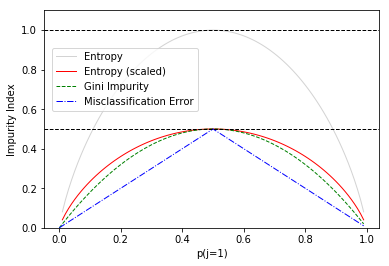

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
scaled_ent = [e*0.5 if e else None for e in ent]
c_err = [classification_error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, scaled_ent, gini(x), c_err],
      ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
      ['-', '-', '--', '-.'],
      ['lightgray', 'red', 'green', 'blue']):
   line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(j=1)')
plt.ylabel('Impurity Index')
plt.show()